# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import api_keys
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(api_keys)

4f72a2392bf21af12ce56c1d97470ae8


### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 641
['illoqqortoormiut', 'olafsvik', 'bauchi', 'cabo san lucas', 'taolanaro', 'tingo maria', 'bredasdorp', 'busselton', 'sitio novo do tocantins', 'severo-kurilsk', 'dutse', 'bambous virieux', 'coquimbo', 'hobart', 'ushuaia', 'bluff', 'punta arenas', 'librazhd', 'la ronge', 'grenaa', 'mataura', 'youkounkoun', 'polunochnoye', 'sur', 'moranbah', 'qinhuangdao', 'concordia', 'rikitea', 'road town', 'sitka', 'villa alemana', 'kahului', 'albany', 'ayan', 'hualmay', 'trincomalee', 'kodiak', 'jamestown', 'barrow', 'waingapu', 'havre-saint-pierre', 'egvekinot', 'cherskiy', 'puerto carreno', 'qaanaaq', 'chuguyevka', 'maningrida', 'belushya guba', 'asaba', 'san cristobal', 'new norfolk', 'high level', 'alofi', 'port elizabeth', 'hilo', 'bethel', 'zunyi', 'chuy', 'mayor pablo lagerenza', 'lorengau', 'arlit', 'valeni', 'cabedelo', 'airai', 'beringovskiy', 'hermanus', 'paita', 'nampa', 'leningradskiy', 'verkh-usugli', 'attawapiskat', 'saleaula', 'atuona', 'padang', 'mah

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
# from urllib import response

url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_keys

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set cities values to first five for easy computation
# cities = cities[:5]

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    # city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_keys}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url, verify=False)
        city_weather = requests.get(city_url).json()
        
        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print (e)
        print("City not found. Skipping...")
        pass
      


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
'coord'
City not found. Skipping...
Processing Record 2 of Set 1 | olafsvik
Processing Record 3 of Set 1 | bauchi
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 6 of Set 1 | tingo maria
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | sitio novo do tocantins
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | dutse
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | librazhd
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | grenaa
Processing Record

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [29]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,64.8945,-23.7142,-2.14,49,100,11.07,IS,1675834465
1,bauchi,10.5000,10.0000,16.81,27,80,2.06,NG,1675834868
2,cabo san lucas,22.8909,-109.9124,20.28,53,89,0.89,MX,1675834640
3,tingo maria,-9.2895,-76.0088,19.89,98,58,0.58,PE,1675834869
4,bredasdorp,-34.5322,20.0403,21.14,67,4,5.82,ZA,1675834869
5,busselton,-33.6500,115.3333,28.89,43,0,4.55,AU,1675834870
6,sitio novo do tocantins,-5.5183,-47.4611,24.96,88,0,1.03,BR,1675834870
7,severo-kurilsk,50.6789,156.1250,-4.79,73,32,5.23,RU,1675834871
8,dutse,11.7594,9.3392,16.45,26,80,3.07,NG,1675834871
9,bambous virieux,-20.3428,57.7575,29.01,74,75,6.69,MU,1675834872


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olafsvik,64.8945,-23.7142,-2.14,49,100,11.07,IS,1675834465
1,bauchi,10.5000,10.0000,16.81,27,80,2.06,NG,1675834868
2,cabo san lucas,22.8909,-109.9124,20.28,53,89,0.89,MX,1675834640
3,tingo maria,-9.2895,-76.0088,19.89,98,58,0.58,PE,1675834869
4,bredasdorp,-34.5322,20.0403,21.14,67,4,5.82,ZA,1675834869


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

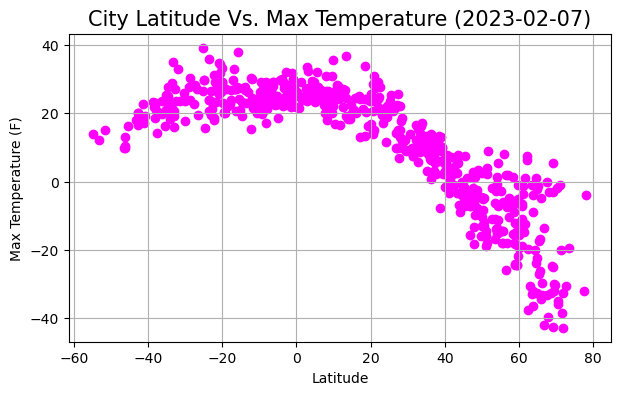

In [32]:
# Build scatter plot for latitude vs. temperature
graph, graph_axes = plt.subplots(figsize=(7,4))
graph_axes.scatter(city_data_df["Lat"], 
                   city_data_df["Max Temp"], color='magenta')

# # Incorporate the other graph properties
graph_axes.set_title("City Latitude Vs. Max Temperature (" + pd.to_datetime("today").strftime("%Y-%m-%d") + ")" , fontsize=15)
graph_axes.set_ylabel("Max Temperature (F)", fontsize=10);
graph_axes.set_xlabel("Latitude", fontsize=10);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

# Save the figure
plt.savefig('output_data/Latitude vs Temperature.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')

#### Latitude Vs. Humidity

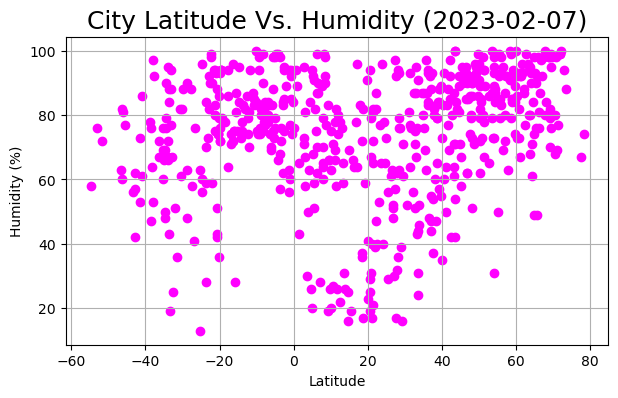

In [33]:
# Build the scatter plots for latitude vs. humidity
# plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

graph, graph_axes = plt.subplots(figsize=(7,4))
graph_axes.scatter(city_data_df["Lat"], 
                   city_data_df["Humidity"], color='magenta')

# Incorporate the other graph properties                                                     
graph_axes.set_title("City Latitude Vs. Humidity (" + pd.to_datetime("today").strftime("%Y-%m-%d") + ")" , fontsize=18)
graph_axes.set_ylabel("Humidity (%)", fontsize=10);
graph_axes.set_xlabel("Latitude", fontsize=10);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

# Save the figure
plt. savefig('output_data/Latitude vs Humidity.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [34]:
city_data_df["Cloudiness"]

City_ID
0      100
1       80
2       89
3       58
4        4
      ... 
582     51
583      0
584     14
585      0
586     31
Name: Cloudiness, Length: 587, dtype: int64

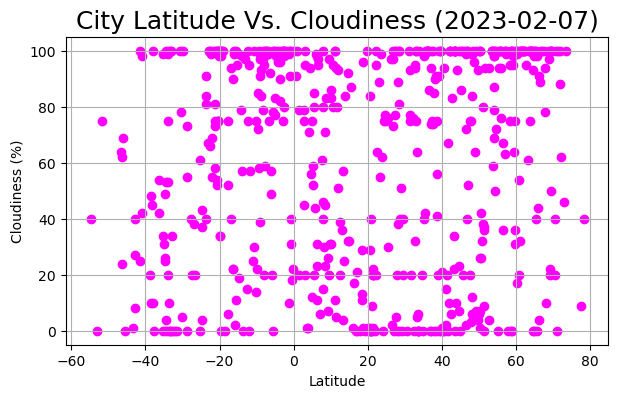

In [35]:
# Build the scatter plots for latitude vs. cloudiness
graph, graph_axes = plt.subplots(figsize=(7,4))
graph_axes.scatter(city_data_df["Lat"], 
                   city_data_df["Cloudiness"], color='magenta')

# Incorporate the other graph properties                                                         
graph_axes.set_title("City Latitude Vs. Cloudiness (" + pd.to_datetime("today").strftime("%Y-%m-%d") + ")" , fontsize=18)
graph_axes.set_ylabel("Cloudiness (%)", fontsize=10);
graph_axes.set_xlabel("Latitude", fontsize=10);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

# Save the figure
plt. savefig('output_data/Latitude vs Cloudiness.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

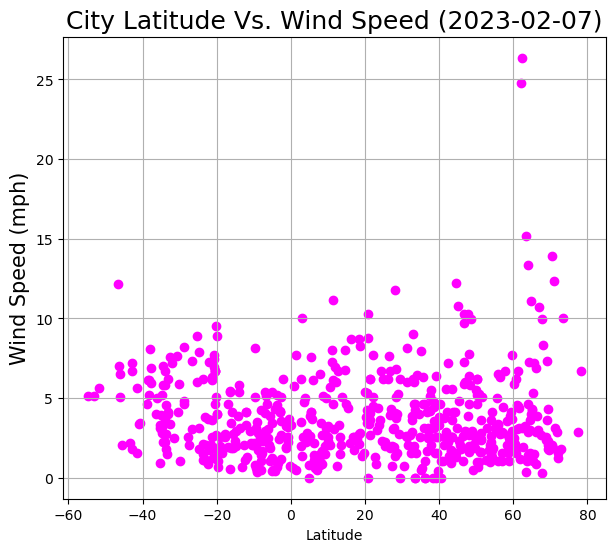

In [36]:
# Build the scatter plots for latitude vs. wind speed
graph, graph_axes = plt.subplots(figsize=(7,6))
graph_axes.scatter(city_data_df["Lat"], 
                   city_data_df["Wind Speed"], color='magenta')

# Incorporate the other graph properties                                                         
graph_axes.set_title("City Latitude Vs. Wind Speed (" + pd.to_datetime("today").strftime("%Y-%m-%d") + ")" , fontsize=18)
graph_axes.set_ylabel("Wind Speed (mph)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=10);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

# Save the figure
plt. savefig('output_data/Latitude vs WindSpeed.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olafsvik,64.8945,-23.7142,-2.14,49,100,11.07,IS,1675834465
1,bauchi,10.5000,10.0000,16.81,27,80,2.06,NG,1675834868
2,cabo san lucas,22.8909,-109.9124,20.28,53,89,0.89,MX,1675834640
7,severo-kurilsk,50.6789,156.1250,-4.79,73,32,5.23,RU,1675834871
8,dutse,11.7594,9.3392,16.45,26,80,3.07,NG,1675834871


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tingo maria,-9.2895,-76.0088,19.89,98,58,0.58,PE,1675834869
4,bredasdorp,-34.5322,20.0403,21.14,67,4,5.82,ZA,1675834869
5,busselton,-33.6500,115.3333,28.89,43,0,4.55,AU,1675834870
6,sitio novo do tocantins,-5.5183,-47.4611,24.96,88,0,1.03,BR,1675834870
9,bambous virieux,-20.3428,57.7575,29.01,74,75,6.69,MU,1675834872


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8939216568120147 


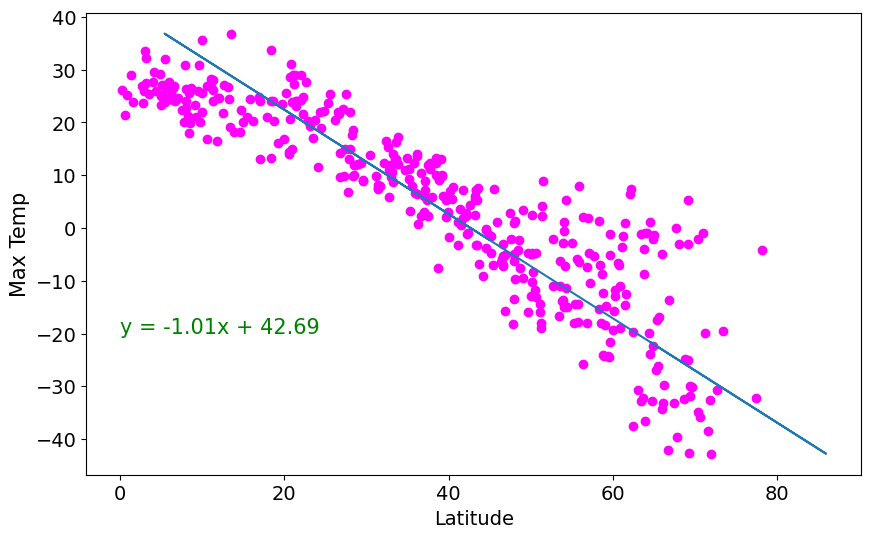

In [40]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

correlation_coefficent = northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])

print(f"The r-value is: {correlation_coefficent} ")

max_temps = northern_hemi_df["Max Temp"]
northern_latitudes = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temps, northern_latitudes)
regress_values = max_temps * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, max_temps, color='magenta')
graph_axes.plot(regress_values, max_temps)

graph_axes.annotate(regress_equation,(0,-20), fontsize=15, color="green")
graph_axes.set_ylabel("Max Temp", fontsize=15)
graph_axes.set_xlabel("Latitude", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Northern Hemisphere Temperature vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

# Save the figure


The r-value is: 0.43058232557069914 


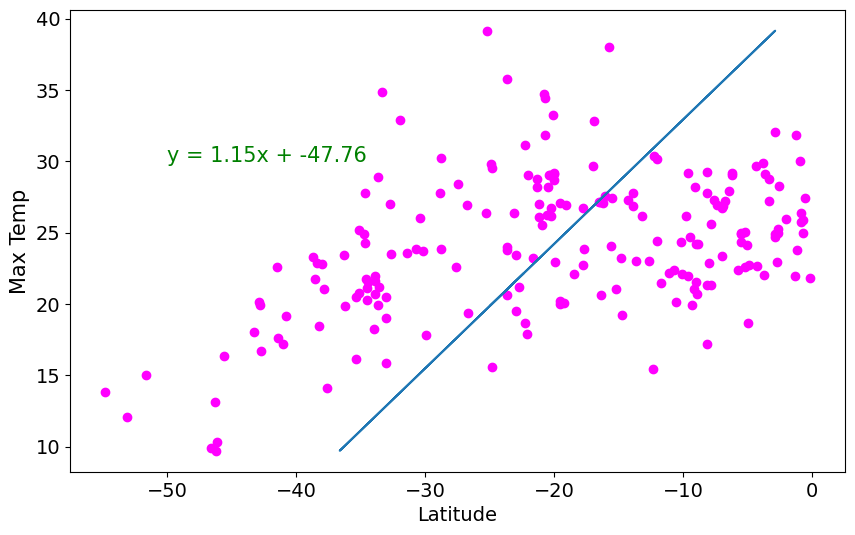

In [48]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

correlation_coefficent = southern_hemi_df["Max Temp"].corr(southern_hemi_df["Lat"])

print(f"The r-value is: {correlation_coefficent} ")

max_temps = southern_hemi_df["Max Temp"]
southern_latitudes = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temps, southern_latitudes)
regress_values = max_temps * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, max_temps, color='magenta')
graph_axes.plot(regress_values, max_temps)

graph_axes.annotate(regress_equation,(-50,30), fontsize=15, color="green")
graph_axes.set_ylabel("Max Temp", fontsize=15)
graph_axes.set_xlabel("Latitude", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Southern Hemisphere Temperature vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

**Discussion about the linear relationship:** As we move away from the equator, temperatures are decreasing for Northern Hemisphere. On the contrary, In Southern Hemisphere, as we move closer to the equator, temperatures are rising. Based on the R value, correlation between latitude and max temperature is positive in northern hemisphere and negative in southern hemisphere. Correlation is weaker in southern hemisphere at 0.36.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4229420429533703 


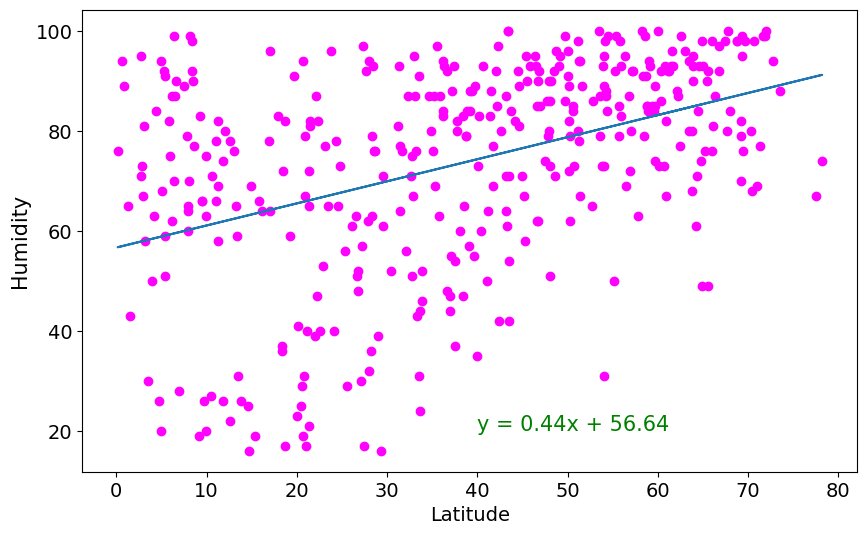

In [49]:
# Northern Hemisphere
correlation_coefficent = northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])

print(f"The r-value is: {correlation_coefficent} ")

humidity = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, humidity)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, humidity, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(40,20), fontsize=15, color="green")
graph_axes.set_ylabel("Humidity", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Northern Hemisphere Humidity vs Latitude .png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

The r-value is: 0.33038151940327154 


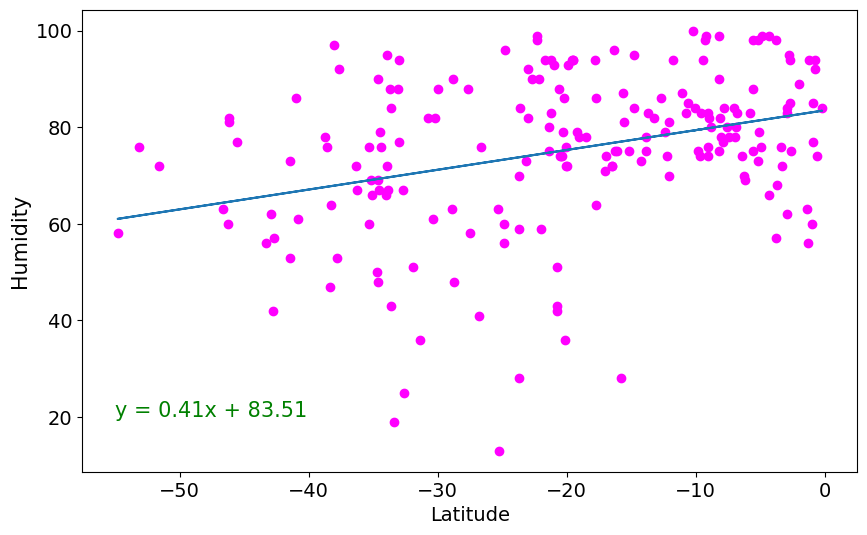

In [50]:
# Southern Hemisphere
correlation_coefficent = southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])

print(f"The r-value is: {correlation_coefficent} ")

humidity = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, humidity)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, humidity, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-55,20), fontsize=15, color="green")
graph_axes.set_ylabel("Humidity", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Southern Hemisphere Humidity vs Latitude .png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: As we move away from the equator, notice general positive trend with Humidity levels.
Southern Hemisphere: As we move towards the equator, Humidity levels increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21369497164984172 


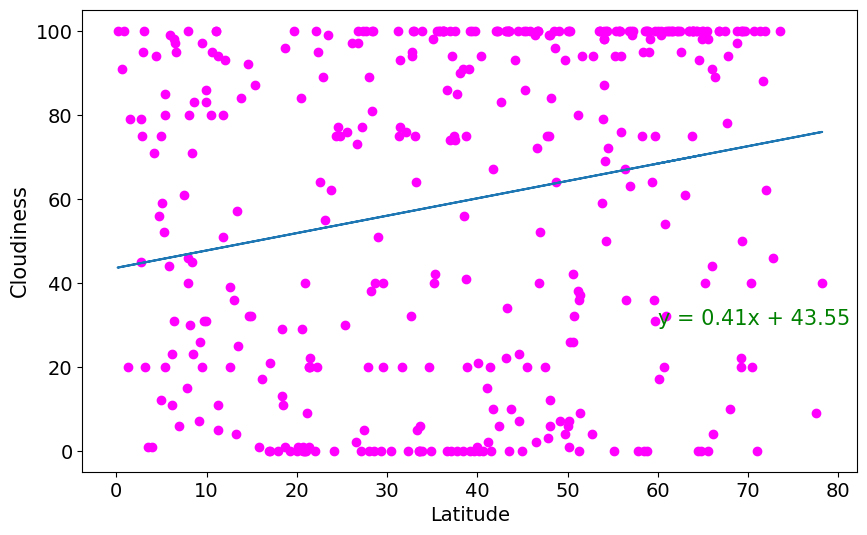

In [53]:
# Northern Hemisphere
correlation_coefficent = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])

print(f"The r-value is: {correlation_coefficent} ")

cloudiness = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, cloudiness)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, cloudiness, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(60,30), fontsize=15, color="green")
graph_axes.set_ylabel("Cloudiness", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Northern Hemisphere Cloudiness vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

The r-value is: 0.3785761209315987 


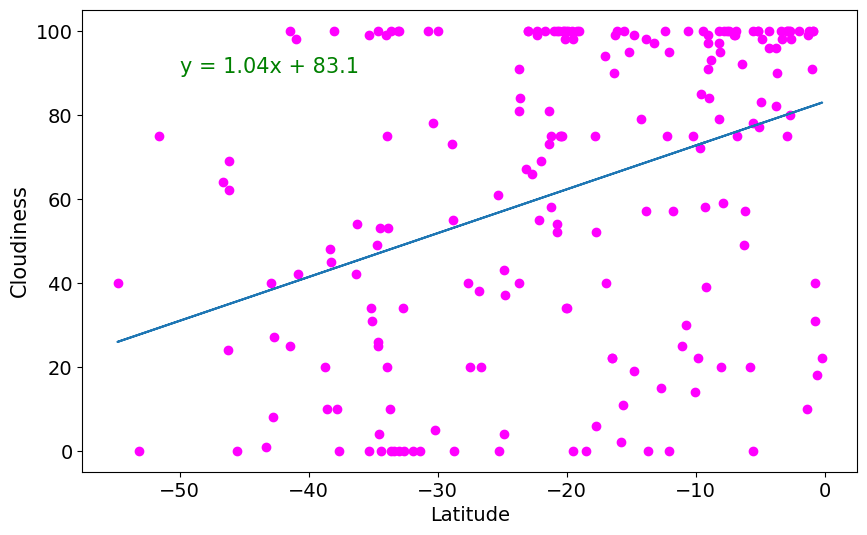

In [51]:
# Southern Hemisphere
correlation_coefficent = southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"])

print(f"The r-value is: {correlation_coefficent} ")

cloudiness = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, cloudiness)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, cloudiness, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-50,90), fontsize=15, color="green")
graph_axes.set_ylabel("Cloudiness", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Southern Hemisphere Cloudiness vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

**Discussion about the linear relationship:** The correlation between Latitude and Cloudiness in both northern and southern hemisphere is positive

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07139270229204604 


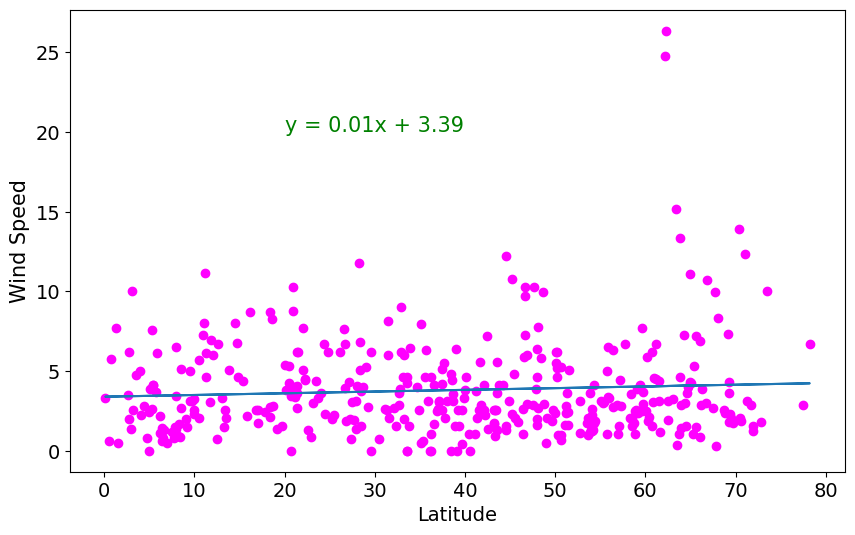

In [46]:
# Northern Hemisphere
correlation_coefficent = northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])

print(f"The r-value is: {correlation_coefficent} ")

wind_speed = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, wind_speed)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, wind_speed, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(20,20), fontsize=15, color="green")
graph_axes.set_ylabel("Wind Speed", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Northern Hemisphere Wind Speed vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

The r-value is: -0.3724673992850209 


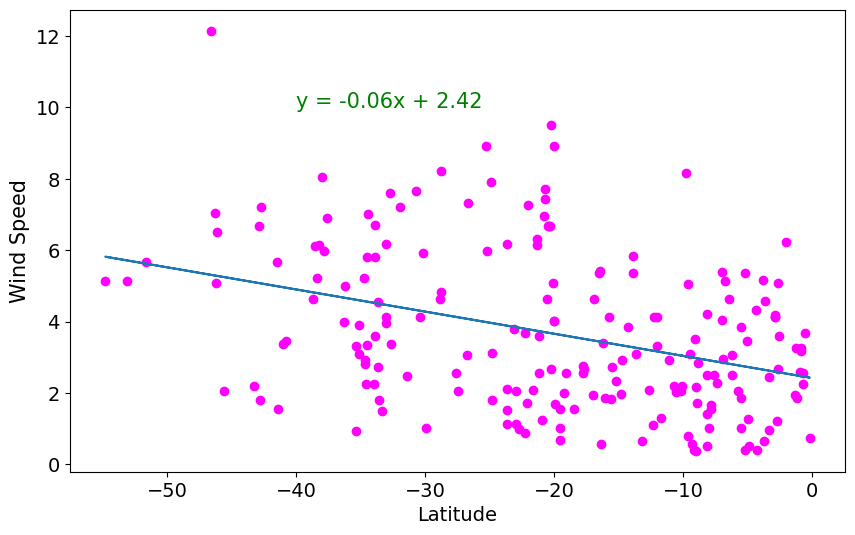

In [52]:
# Southern Hemisphere
correlation_coefficent = southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])

print(f"The r-value is: {correlation_coefficent} ")

wind_speed = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, wind_speed)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, wind_speed, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-40,10), fontsize=15, color="green")
graph_axes.set_ylabel("Wind Speed", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('output_data/Southern Hemisphere Wind Speed vs Latitude.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

**Discussion about the linear relationship:** The correlation between Latitude and Wind Speed is very weak. With a value of 0.1 in Northern Hemisphere and -0.35 in Southern Hemisphere.